<a href="https://colab.research.google.com/github/AmirShitrit/L28/blob/main/C2F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, import the necessary libraries

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Next, prepare the training and testing data

In [43]:
celsius_q = np.array([-10, 15, 3, 0, 32, 34, 56, 100, 1, -44], dtype=float)
fahrenheit_a = np.array([14, 59, 37.4, 32, 89.6, 93.2, 132.8, 212, 33.8, -47.2], dtype=float)

Next, define the layer

In [44]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

Now, the training phase

In [45]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


Let's test the model on a new unknown sample

In [46]:
print(model.predict(np.array([100.0], dtype=float)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[212.24486]]


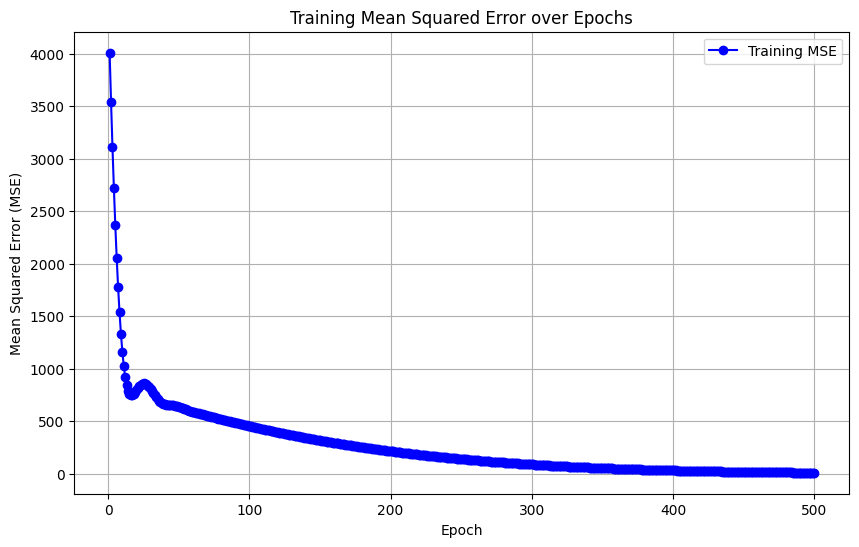

In [47]:
# Extract the MSE values from the history object
mse = history.history['loss']

# Create a range of epochs to use for the x-axis
epochs = range(1, len(mse) + 1)

# Plot the data
plt.figure(figsize=(10, 6)) # Optional: adjust the figure size
plt.plot(epochs, mse, 'bo-', label='Training MSE') # 'bo-' for blue circles and lines

# Add labels and a title
plt.title('Training Mean Squared Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend() # Show the legend

# Optional: add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

Let's checkout the weights...

In [48]:
print(l0.get_weights())

[array([[1.8367409]], dtype=float32), array([28.570776], dtype=float32)]


Now, let's see what happens if we add more layers.

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
model.predict(np.array([100.0], dtype=float))

In [ ]:
# Extract the MSE values from the history object
mse = history.history['loss']

# Create a range of epochs to use for the x-axis
epochs = range(1, len(mse) + 1)

# Plot the data
plt.figure(figsize=(10, 6)) # Optional: adjust the figure size
plt.plot(epochs, mse, 'bo-', label='Training MSE') # 'bo-' for blue circles and lines

# Add labels and a title
plt.title('Training Mean Squared Error over Epochs (with an extra hidden layer)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend() # Show the legend

# Optional: add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()